# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



server_path = 'C:/Users/Admin/Documents/project datasets/real_estate_data.csv'
filename = 'real_estate_data.csv'


try:
    df = pd.read_csv(server_path, sep = '\t') #пробуем найти данные по сетевому адресу
except: 
    df = pd.read_csv(filename) #если не можем найти данные по сетевому адресу, ищем по локальному
    

    
display(df.head())
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В таблице df 22 столбца и 23699 строк.

Типы данных: bool(2), float64(14), int64(3), object(3).

В таблице наглядно видим большое количество пропусков и преимущественно вещественные числа.


## Предобработка данных

### Обработка пропусков

In [2]:
#переименуем столбцы
df.set_axis(['total_images', 'price', 'total_area', 'day_publication', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality', 'distance_airport', 'city_centers_distance', 'number_parking3000', 'distance_park', 'number_reservoirs3000', 'distance_reservoir', 'days_exposition'], axis = 'columns', inplace = True)
df.columns

Index(['total_images', 'price', 'total_area', 'day_publication', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor', 'apartment',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality',
       'distance_airport', 'city_centers_distance', 'number_parking3000',
       'distance_park', 'number_reservoirs3000', 'distance_reservoir',
       'days_exposition'],
      dtype='object')

Переименовали столбцы следующим образом:
total_images - количество фото price - цена total_area - общая площадь day_publication - дата публикации rooms - число комнат ceiling_height - высота потолков floors_total - общее число этажей в доме living_area - жилая площадь floor - этаж apartment - квартира (булевое значение) studio - студия open_plan - свободная планировка (булевое значение) kitchen_area - площадь кухни balcony - число балконов locality - название местности distance_airport - расстояние до ближайшего аэропорта city_centers_distance - расстояние до центра города number_parking3000 - число парков в радиусе 3 км distance_park - расстояние до ближайшего парка number_reservoirs3000 - количество водоемов в радиусе 3 км distance_reservoir - расстояние до ближайшего водоема days_exposition - сколько дней размещено объявление

In [3]:
print('Пропуски до:')
print()
print(df.isna().sum())

#заполним пропуски
df['balcony'] = df['balcony'].fillna(0)

df.dropna(subset = ['locality'], inplace = True)

df['distance_airport'] = df['distance_airport'].fillna(0)

df['apartment'] = df['apartment'].fillna(value='True')

Пропуски до:

total_images                 0
price                        0
total_area                   0
day_publication              0
rooms                        0
ceiling_height            9195
floors_total                86
living_area               1903
floor                        0
apartment                20924
studio                       0
open_plan                    0
kitchen_area              2278
balcony                  11519
locality                    49
distance_airport          5542
city_centers_distance     5519
number_parking3000        5518
distance_park            15620
number_reservoirs3000     5518
distance_reservoir       14589
days_exposition           3181
dtype: int64


Пропуски были обнаружены в 14 столбцах.
Заполнили их по следующим принципам:
1. Пропуски в числе балконом возникли скорее всего, потому что их нет в наличии. Заполнили нулями.
2. Пропуски в населенных пунктах удалили.
3. Пропуски в расстоянии до аэропорта заменили на нули, так как, вероятно, аэропорта в населенном пункте не оказалось.
4. Пропуски в апартаментах заменим на True.

In [4]:
#заполним пропуски с расстоянием до центра города   
df.groupby('locality')['city_centers_distance'].median()
df['city_centers_distance'] = df.groupby('locality')['city_centers_distance'].apply(lambda x: x.fillna(x.median()))     

Заполнили пропуски по следующим принципам:

5. Расстояние до центра города зависит от от населенного пункта.

In [5]:
#заполним пропуски этажей    
df.groupby('floor')['floors_total'].median()
df['floors_total'] = df.groupby('floor')['floors_total'].apply(lambda x: x.fillna(x.median())) 
    
    
#заполним пропуски с высотой потолка
df.groupby('floors_total')['ceiling_height'].median()
df['ceiling_height'] = df.groupby('floors_total')['ceiling_height'].apply(lambda x: x.fillna(x.median()))     

Заполнили пропуски по следующим принципам:

6. Количество этажей в доме зависит от населения. Так как в разных населенных пунктах разная высота зданий, у городов она может быть самая разная, у населенных пунктов поменьше - не такой большой разброс. 

In [6]:
#заполним пропуски с жилой площадью
df.groupby('total_area')['living_area'].median()
df['living_area'] = df.groupby('total_area')['living_area'].apply(lambda x: x.fillna(x.median()))    
    
    

#заполним пропуски с  площадью кухни
df.groupby('total_area')['kitchen_area'].median()
df['kitchen_area'] = df.groupby('total_area')['kitchen_area'].apply(lambda x: x.fillna(x.median()))    

Заполнили пропуски по следующим принципам:

7. Жилая площадь и площадь кухни зависят от общей площади жилья.

In [7]:
#пропуски с количеством парков
df['number_parking3000'] = df['number_parking3000'].fillna(0)

#пропуски с количесттвом водоемов
df['number_reservoirs3000'] = df['number_reservoirs3000'].fillna(0)

#пропуски с расстоянием до водоема
df['distance_reservoir'] = df['distance_reservoir'].fillna(0) 

Заполнили пропуски по следующим принципам:

8. Пропуски в количестве парков и водоемов  могли возникнуть, потому что их не оказалось в населенном пункте. Заменили нулями.
9. Соответственно расстояни до водоема, исходя из п.8., также заменили нулями.

In [8]:
#заполним пропуски с расстоянием до парка
df.groupby('number_parking3000')['distance_park'].median()
df['distance_park'] = df.groupby('number_parking3000')['distance_park'].apply(lambda x: x.fillna(x.median()))
    
    
df['city_centers_distance'] = df['city_centers_distance'].fillna(0)      

Заполнили пропуски по следующим принципам:

10. Расстояние до парка может зависеть от количества парков.

In [9]:
print('Пропуски после:')
print()
print(df.isna().sum()) 

Пропуски после:

total_images                0
price                       0
total_area                  0
day_publication             0
rooms                       0
ceiling_height              1
floors_total                0
living_area               143
floor                       0
apartment                   0
studio                      0
open_plan                   0
kitchen_area              205
balcony                     0
locality                    0
distance_airport            0
city_centers_distance       0
number_parking3000          0
distance_park               0
number_reservoirs3000       0
distance_reservoir          0
days_exposition          3180
dtype: int64


Таким образом, удалось обработать все столбцы с пропущенными значениями и тем самым подготовить данные для анализа.

### Замена типа данных

In [10]:
#замена типа данных
df['price'] = df['price'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['apartment'] = df['apartment'].astype('bool')
df['balcony'] = df['balcony'].astype('int')
df['day_publication'] = pd.to_numeric(df['day_publication'], errors='ignore')
df['number_parking3000'] = df['number_parking3000'].astype('int')
df['number_reservoirs3000'] = df['number_reservoirs3000'].astype('int')
df['locality'] = df['locality'].astype('category')
#проверка
print('Обновленный тип данных:', df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   total_images           23650 non-null  int64   
 1   price                  23650 non-null  int32   
 2   total_area             23650 non-null  float64 
 3   day_publication        23650 non-null  object  
 4   rooms                  23650 non-null  int64   
 5   ceiling_height         23649 non-null  float64 
 6   floors_total           23650 non-null  int32   
 7   living_area            23507 non-null  float64 
 8   floor                  23650 non-null  int64   
 9   apartment              23650 non-null  bool    
 10  studio                 23650 non-null  bool    
 11  open_plan              23650 non-null  bool    
 12  kitchen_area           23445 non-null  float64 
 13  balcony                23650 non-null  int32   
 14  locality               23650 non-null 

### Вывод

Данные имеют соответствующий им тип данных. Таблица преобразилась.

## Расчёты и добавление результатов в таблицу

In [11]:
#цена за 1 кв.м.
df['price_1m2'] = df['price'] / df['total_area']


df['publication_date'] = pd.to_datetime(
    df['day_publication'], format='%Y%m%dT%H:%M:%S'
)

#новый столбец с днем недели
df['weekday_publication'] = df['publication_date'].dt.weekday
#новый столбец с номером месяца
df['month_publication'] = df['publication_date'].dt.month
#новый столбец с номером года
df['year_publication'] = df['publication_date'].dt.year


#соотношение жилой площади к общей 
df['share_living_space'] = df['living_area'] / df['total_area']

#соотношение площади кухни к общей площади
df['kitchen_share'] = df['kitchen_area'] / df['total_area']


#этаж квартиры (первый, последний, другой)
def categorizing_floors(row):
    floor = row['floor']
    house_size = row['floors_total']

    if floor == 1:
        return 'первый этаж'
    if floor == house_size:
        return 'последний этаж'
    return 'другой' 


df['categorizing_floors'] = df.apply(categorizing_floors, axis=1) 
print(df['categorizing_floors'].value_counts())  

другой            17408
последний этаж     3330
первый этаж        2912
Name: categorizing_floors, dtype: int64


### Вывод

Посчитали цену 1 кв.м., соотношение жилой площали к общей, площади кухни к общей площади.
Разбили дату на дни, месяца и года и создали соответствующие им столбцы.
Создали категоризацию для этажей в доме (первый, последний, другой) и вывели результат.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цену, число комнат, высоту потолков. Построим гистограммы для каждого параметра.

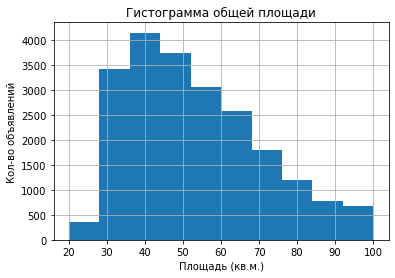

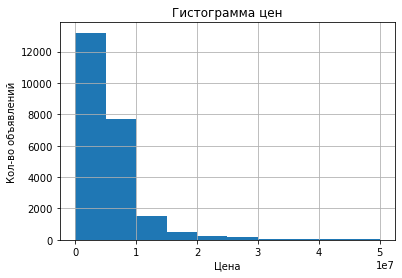

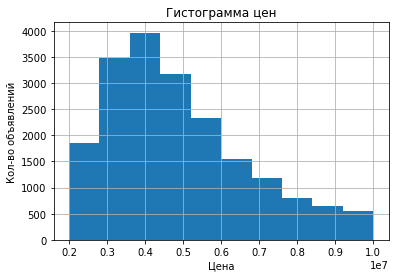

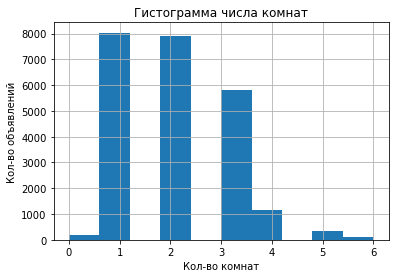

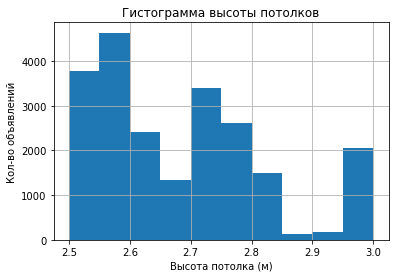

In [12]:
df['total_area'].plot(title='Гистограмма общей площади', kind='hist', grid=True,  range=(20, 100))
plt.ylabel('Кол-во объявлений')
plt.xlabel('Площадь (кв.м.)')
plt.show()


df['price'].plot(title='Гистограмма цен', kind='hist', grid=True,  range=(0, 50000000))
plt.ylabel('Кол-во объявлений')
plt.xlabel('Цена')
plt.show()


df['price'].plot(title='Гистограмма цен', kind='hist', grid=True,   range=(2000000, 10000000))
plt.ylabel('Кол-во объявлений')
plt.xlabel('Цена')
plt.show()


df['rooms'].plot(title='Гистограмма числа комнат', kind='hist', grid=True,   range=(0, 6))
plt.ylabel('Кол-во объявлений')
plt.xlabel('Кол-во комнат')
plt.show()


df['ceiling_height'].plot(title='Гистограмма высоты потолков', kind='hist', grid=True,  range=(2.5, 3))
plt.ylabel('Кол-во объявлений')
plt.xlabel('Высота потолка (м)')
plt.show()

1. По гистограмме общей площади можно сказать, что чаще всего покупают жилье площадью до 100 кв.м. Площадь более 250 кв.м. встречается очень редко.

2. По гистограмме цен можно сказать, что цены на жилье более 4млн. идут плавно на спад, а от 20млн встречаются значительно реже. Самый пик цен приходится на 3-4 млн.

3. По гистограмме числа комнат можно заметить частоту приобретения 1-3-комнатных помещений. 

4. По гистограмме высоты потолков заметно значительное предпочтение помещений с 2,5м потолками. Потолки 3м также встречаются часто, потолки менее 2.5 и более 3.25 встречаются редко. Потолки 4м практически не встречаются.

Изучим время продажи квартиры и построим гистограмму. Посчитаем среднее и медиану времени продажи.

Всего совершено продаж: 23650



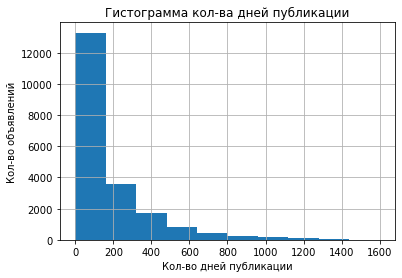

In [13]:
number_of_sales = df.shape[0]
print('Всего совершено продаж: {}'.format(number_of_sales))
print()


df['days_exposition'].plot(title='Гистограмма кол-ва дней публикации', kind='hist', grid=True,  range=(0, 1600))
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во объявлений')   
plt.show()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

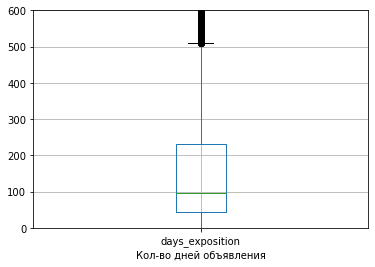

In [14]:
#определим выбросы для количества дней размещения объявления
ax=df.boxplot('days_exposition', grid=True)
ax.set_ylim([0, 600])
plt.xlabel('Кол-во дней объявления')

df['days_exposition'].describe()

Вывод: Итак, из 23650 совершенных продаж, среднее время продаж составило 180 дней, а медианное только 95. Разница в 2 раза. Самая быстрая продажа состялась за 1 день.

Но ведь продажа за 1 день - это необычно быстро для такой крупной сделки. Будем считать нормальное время продаж, начиная с 37 дней (первый квартиль) и заканчивая 231 днем (3 квартиль).



count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

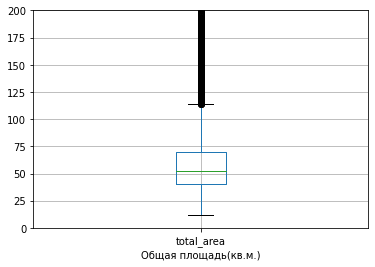

In [15]:
#определим выбросы для общей площади

ax=df.boxplot('total_area', grid=True)
ax.set_ylim([0, 200])
plt.xlabel('Общая площадь(кв.м.)')

df['total_area'].describe()

Оптимальный промежуток общей площади от 20 кв.м. до 130 кв.м.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

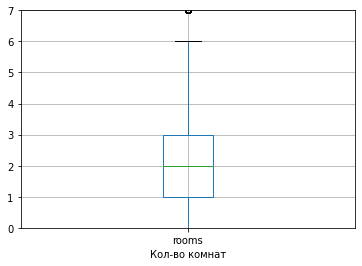

In [16]:
#определим выбросы для количества комнат

ax=df.boxplot('rooms', grid=True)
ax.set_ylim([0, 7])
plt.xlabel('Кол-во комнат')

df['rooms'].describe()

Количество комнат без выбросов рассмотрим по границам усов - от 0 до 6 комнат. 
0 комнат- студии.

count    23649.000000
mean         2.735507
std          0.995258
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

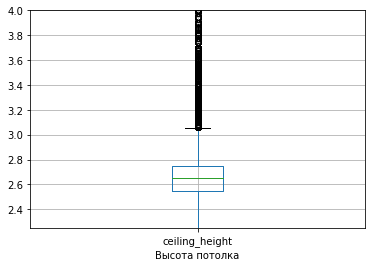

In [17]:
#определим выбросы для высоты потолка

ax=df.boxplot('ceiling_height', grid=True)
ax.set_ylim([2.25, 4])
plt.xlabel('Высота потолка')

df['ceiling_height'].describe()

Высоту потолков рассмотрим 2.4 - 4м

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: price, dtype: float64

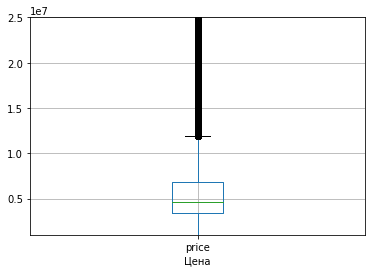

In [18]:
#определим выбросы для цен

ax=df.boxplot('price', grid=True)
ax.set_ylim([1000000, 25000000])
plt.xlabel('Цена')

df['price'].describe()

Для цены рассмотрим промежуток 1млн-25млн

Создадим таблицу без выбросов.

Среднее время продажи без выбросов: 103.06258850184084
Медианное время продажи без выбросов: 90.00000000000001

Таблица усредненного времени продаж по городам до обработки выбросов:
                       count            mean          median
             days_exposition days_exposition days_exposition
locality                                                    
Бокситогорск              14       89.571429            45.0
Волосово                  31      279.516129           114.0
Волхов                    85      152.400000           104.0
Всеволожск               339      197.085546           123.0
Выборг                   208      177.375000            99.5

Таблица усредненного времени продаж по городам после:
              Число продаж  Среднее арифметическое  Медиана
locality                                                   
Бокситогорск             1               45.000000     45.0
Волосово                15               92.800000     84.0
Волхов                  53         

Text(0, 0.5, 'Кол-во объявлений')

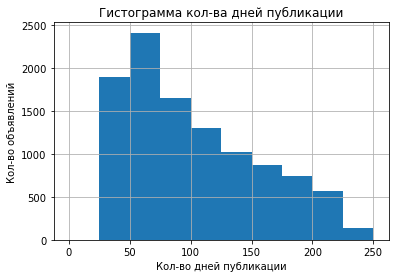

In [19]:
#срез данных, в которых нет маленьких значений и выбросов
df2 = df[(df['days_exposition'] < 232) & (df['days_exposition'] > 36)]
df2 = df2[(df2['total_area'] > 19) & (df2['total_area'] < 131)]
df2 = df2[(df2['rooms'] >= 0) & (df2['rooms'] < 7)]
df2 = df2[(df2['ceiling_height'] > 2.3) & (df2['ceiling_height'] <= 4)]
df2 = df2[(df2['price'] > 1000000) & (df2['price'] < 25000000)]

print('Среднее время продажи без выбросов: {}'.format(df2['days_exposition'].mean()))
print('Медианное время продажи без выбросов: {}'.format(df2['days_exposition'].median()))
print()

print('Таблица усредненного времени продаж по городам до обработки выбросов:')
print(df.pivot_table(index='locality', values='days_exposition', aggfunc=['count', 'mean', 'median']).head())


#проверка данных без выбросов
df3 = (
    df2.pivot_table(index='locality', values='days_exposition', aggfunc=['count', 'mean', 'median'])
)

df3.columns = ['Число продаж', 'Среднее арифметическое', 'Медиана']
print()

print('Таблица усредненного времени продаж по городам после:')
print(df3.head())

#Гистограмма времени продаж без выбросов
df2['days_exposition'].plot(title='Гистограмма кол-ва дней публикации', kind='hist', grid=True,  range=(0, 250))
plt.xlabel('Кол-во дней публикации')
plt.ylabel('Кол-во объявлений') 

Вывод: почистили данные, отбросив выбросы в значениях (общая площадь, количество комнат, высота потолка, количество дней публикации, цена). 

1. Изучим зависимость цен от площади, числа комнат, удалённости от центра. 

2. Изучим зависимость цен от того, на каком этаже расположена квартира: первом, последнем или другом. 

3. Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [20]:
#Посмотрим на взаимосвязь различных факторов (площадь, число комнат, удаленность от центра, этаж, дата публикации объявления) и цены
print('Корелляция цены и площади, количества комнат, расстояния до центра')
print(df2['price'].corr(df2['total_area']))
print(df2['price'].corr(df2['rooms']))
print(df2['price'].corr(df2['city_centers_distance']))
print()


print('Корелляция цены и дня, месяца, года продаж')
print(df2['price'].corr(df2['weekday_publication']))
print(df2['price'].corr(df2['month_publication']))
print(df2['price'].corr(df2['year_publication']))

Корелляция цены и площади, количества комнат, расстояния до центра
0.7380416343013293
0.45202881341399226
0.026549338424232433

Корелляция цены и дня, месяца, года продаж
-0.003151693326332092
0.019859179726211977
0.006631975474290707


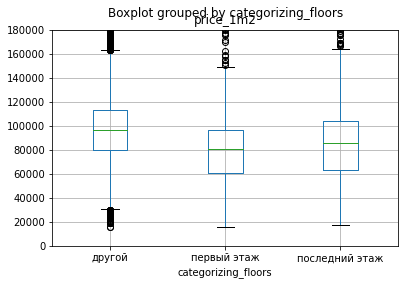

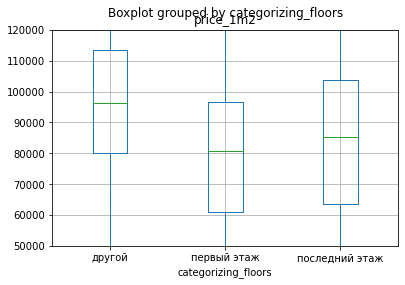

In [21]:
#"ящик с усами" для категорий этажей и цен на них

ax= df2.boxplot(column='price_1m2', by='categorizing_floors', grid=True)
ax.set_ylim([0, 180000])
plt.show()

ax= df2.boxplot(column='price_1m2', by='categorizing_floors', grid=True)
ax.set_ylim([50000, 120000])
plt.show()

Взаимосвязь цены и номера этажа видно наглядно на диаграмме размаха. Итак, как правило, цены на первый этаж ниже, чем на последний, хоть и разница не так велика. А вот цены на другие этажи напорядок выше первых и последних этажей в доме.
Так, к примеру, средняя цена первого этажа составляет примерно 81 000 за 1 кв.м., последнего 85 000, а других этажей - стремится к 100 000.

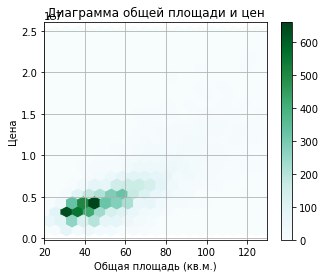

In [22]:
#Диаграмма общей площади и цен
df2.plot(title='Диаграмма общей площади и цен', x='total_area', y='price', kind='hexbin', gridsize=20, figsize=(5, 4),sharex=False, xlim=(20, 130), grid=True)
plt.xlabel('Общая площадь (кв.м.)')
plt.ylabel('Цена')
plt.show()

Итак, чем больше площадь, тем выше цена.

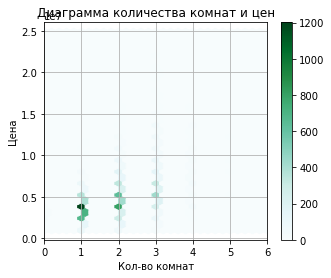

In [23]:
df2.plot(title='Диаграмма количества комнат и цен', x='rooms', y='price', kind='hexbin', gridsize=30, figsize=(5, 4), sharex=False, xlim=(0, 6), grid=True)
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.show()

С увеличение числа комнат растет цена жилья.

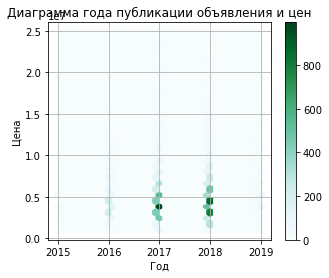

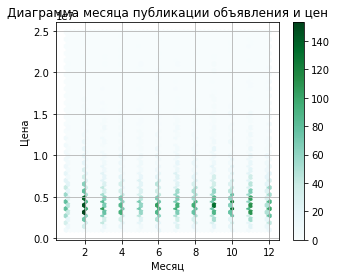

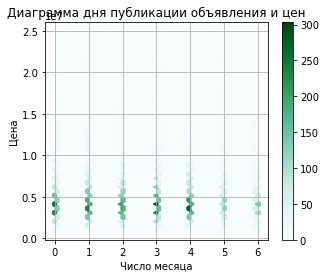

In [24]:
df2.plot(title='Диаграмма года публикации объявления и цен', x='year_publication', y='price', kind='hexbin', gridsize=30, figsize=(5, 4), sharex=False, grid=True)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

df2.plot(title='Диаграмма месяца публикации объявления и цен', x='month_publication', y='price', kind='hexbin', gridsize=50, figsize=(5, 4), sharex=False, grid=True)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

df2.plot(title='Диаграмма дня публикации объявления и цен', x='weekday_publication', y='price', kind='hexbin', gridsize=40, figsize=(5, 4), sharex=False, grid=True)
plt.xlabel('Число месяца')
plt.ylabel('Цена')
plt.show()

На стоимость жилья дата не влияет.

In [25]:
print('Топ 10 городов по количеству объявлений')

price_1m2_group = df2.groupby('locality').agg({'price_1m2':['count', 'mean']})
price_1m2_group.columns=['count_advertisement', 'mean_price_1m2']
price_1m2_group = price_1m2_group.sort_values(by='count_advertisement', ascending=False).head(10)

display(price_1m2_group)
print()

print('max средняя стоимость ')
display(price_1m2_group.head(1))
print()
print('min средняя стоимость ')
display(price_1m2_group.tail(1))


Топ 10 городов по количеству объявлений


,count_advertisement,mean_price_1m2
locality,,
Санкт-Петербург,6865,107698.736381
посёлок Мурино,279,85495.597891
посёлок Шушары,240,78440.049355
Всеволожск,192,70573.656340
Колпино,173,74019.134110
посёлок Парголово,169,88591.332787
деревня Кудрово,162,93357.738647
Пушкин,146,99180.714350
Гатчина,144,67955.512335



max средняя стоимость 


,count_advertisement,mean_price_1m2
locality,,
Санкт-Петербург,6865,107698.736381



min средняя стоимость 


,count_advertisement,mean_price_1m2
locality,,
Выборг,128,57081.524921


Санкт-Петербург лидирует по количеству объявлений. И у него же оказалась самая высокая цена за 1 кв.м., которая составила 107 тыс. А вот в Выборге, входящего в топ-10 городов по количеству объявлений, цена за 1 кв.м. оказалась меньше всех и стоставила 57 тыс., что почти в 2 раза ниже цены г. Санкт-Петербурга.

Интересно, а цены на жилье в Санкт-Петербурге по всему городу одинаковы или все же зависит от расстояния до центра города?

Выделим квартиры в Санкт-Петербурге. Выясним, какая область считается центром. Посчитаем среднюю цену для каждого километра. Построим график зависимости цены от удалённости от центра.

In [26]:
#Данные С-П
piter = df2.query('locality == "Санкт-Петербург"').reset_index()

In [27]:
piter['centr_km']=piter['city_centers_distance'] // 1000
piter.head()

,index,total_images,price,total_area,day_publication,rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,price_1m2,publication_date,weekday_publication,month_publication,year_publication,share_living_space,kitchen_share,categorizing_floors,centr_km
0,4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,...,121.0,100000.000000,2018-06-19,1,6,2018,0.320000,0.410000,другой,8.0
1,10,5,5050000,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,...,137.0,127525.252525,2017-11-16,3,11,2017,0.512626,0.214646,другой,13.0
2,18,8,3250000,31.0,2017-01-27T00:00:00,1,2.50,5,19.4,2,...,168.0,104838.709677,2017-01-27,4,1,2017,0.625806,0.180645,другой,10.0
3,19,16,14200000,121.0,2019-01-09T00:00:00,3,2.75,16,76.0,8,...,97.0,117355.371901,2019-01-09,2,1,2019,0.628099,0.099174,другой,12.0
4,27,20,7100000,70.0,2017-05-12T00:00:00,3,2.60,17,49.0,11,...,151.0,101428.571429,2017-05-12,4,5,2017,0.700000,0.131429,другой,11.0


In [28]:
#переведем расстояние до центра в км
#piter.style.format({'centr_km': '{:.0f}'})

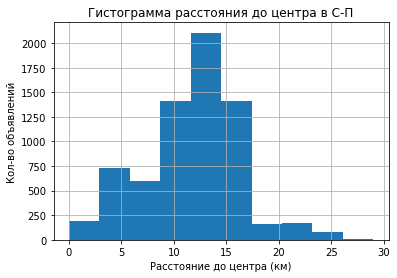

In [29]:
piter['centr_km'].plot(title='Гистограмма расстояния до центра в С-П', kind='hist', grid=True)
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Кол-во объявлений') 
plt.show() 

#средняя цена за каждый км
price_1km_mean = piter.groupby('centr_km').agg({'price_1m2':'mean'})
price_1km_mean.columns=['mean_price_1km']
price_1km_mean = price_1km_mean.sort_values(by='centr_km', ascending=False)

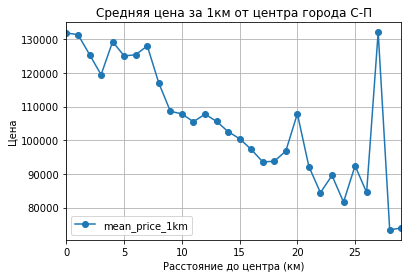

In [30]:
#гистограмма цен в зависимости от расстояния до центра
price_1km_mean.plot(title='Средняя цена за 1км от центра города С-П', style='o-', y='mean_price_1km', xlim=(0, 29), grid=True)
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Цена') 
plt.show()

Чем больше расстояние от центра, тем дешевле 1 кв.м.
Спад цен наблюдается в районе 3 км. Определим этим числом центр города. 

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

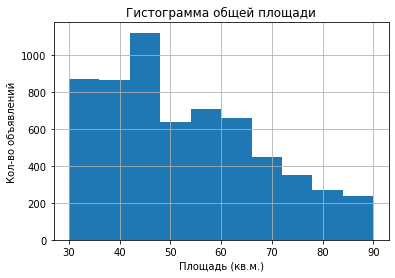

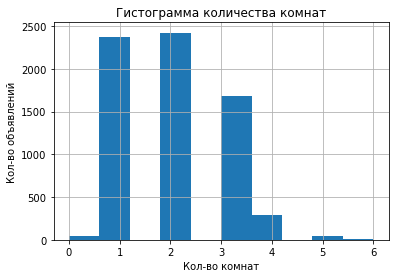

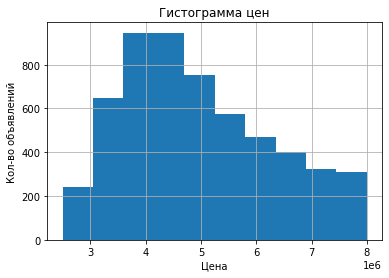

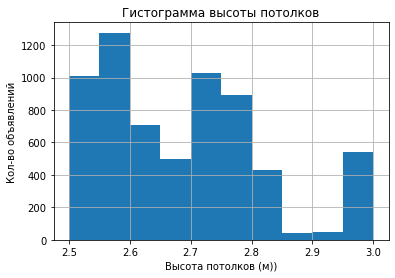

Корелляция цены и этажа, количества комнат, расстояния до центра
0.17221155228540405
0.330307629998716
-0.10795125624244849
Корелляция цены и дня, месяца, года продаж
-0.05010812782949524
-0.09665021010950849
-0.03877792195102813


In [31]:
#центр города С-П
piter2 = piter.query('centr_km < 3')

piter['total_area'].plot(title='Гистограмма общей площади', kind='hist', grid=True, range=(30, 90))
plt.xlabel('Площадь (кв.м.)')
plt.ylabel('Кол-во объявлений') 
plt.show()

piter['rooms'].plot(title='Гистограмма количества комнат', kind='hist', grid=True, range=(0, 6))
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объявлений') 
plt.show()


piter['price'].plot(title='Гистограмма цен', kind='hist', grid=True, range=(2500000, 8000000))
plt.xlabel('Цена')
plt.ylabel('Кол-во объявлений') 
plt.show()

piter['ceiling_height'].plot(title='Гистограмма высоты потолков', kind='hist', grid=True, range=(2.5, 3))
plt.xlabel('Высота потолков (м))')
plt.ylabel('Кол-во объявлений') 
plt.show()

print('Корелляция цены и этажа, количества комнат, расстояния до центра')
print(piter2['price'].corr(piter2['floor']))
print(piter2['price'].corr(piter2['rooms']))
print(piter2['price'].corr(piter2['centr_km']))


print('Корелляция цены и дня, месяца, года продаж')
print(piter2['price'].corr(piter2['weekday_publication']))
print(piter2['price'].corr(piter2['month_publication']))
print(piter2['price'].corr(piter2['year_publication']))

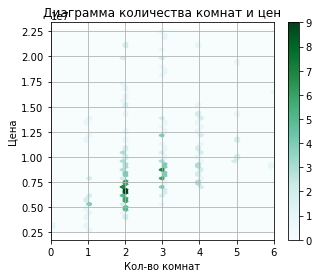

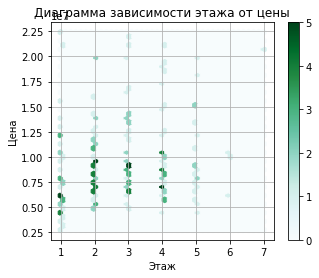

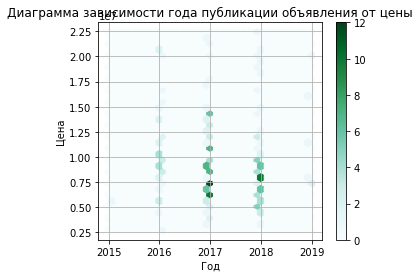

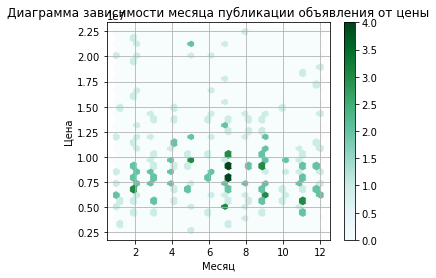

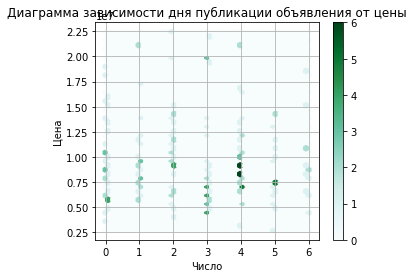

In [32]:
piter2.plot(title='Диаграмма количества комнат и цен', x='rooms', y='price', kind='hexbin', gridsize=40, figsize=(5, 4), sharex=False, xlim=(0,6), grid=True)
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена')
plt.show()

piter2.plot(title='Диаграмма зависимости этажа от цены', x='floor', y='price', kind='hexbin', gridsize=40, figsize=(5, 4), sharex=False, grid=True)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

piter2.plot(title='Диаграмма зависимости года публикации объявления от цены', x='year_publication', y='price', kind='hexbin', gridsize=30, figsize=(5, 4), sharex=False, grid=True)
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

piter2.plot(title='Диаграмма зависимости месяца публикации объявления от цены', x='month_publication', y='price', kind='hexbin', gridsize=30, figsize=(5, 4), sharex=False, grid=True)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

piter2.plot(title='Диаграмма зависимости дня публикации объявления от цены', x='weekday_publication', y='price', kind='hexbin', gridsize=40, figsize=(5, 4), sharex=False, grid=True)
plt.xlabel('Число')
plt.ylabel('Цена')
plt.show()

Чем больше комнат, тем выше цена.

Цены на 1 и 2 этажи примерно одинаковы, начиная с 3 этажа немного повышатся. Зависимость этажа и цены незначительна.

Год публикации объявления на цену не влияет.

Цены в январе, феврале, июне, июле, декабре выше. 

Особого влияния числа публикации на цену нет.


### Вывод

В центре города Санкт-Петербург покупатели предпочитают приобретать жилье общей площадью от 30 до 65 кв.м., самая популярная площадь - от 40-50 кв.м., с 1, 2 или 3 комнатами, с высотой потолков 2.5-2.55 и 2.7 метров и ценой от 3.5-6 млн.

## Общий вывод

Итак, что влияет на цену жилья? На этот вопрос попытаемся ответить.

В начале исследования был произведен анализ данных по всем городам, из большого количества выделили 10 городов по количеству объявлений. Самым большим таким городом оказался г. Санкт-петербург. Чем он еще примечателен: тем, что в нем оказалась и самая дорогая цена за 1 кв.м.

На его примере подробнее изучили показатели и сравнили их с общими по всем городам.

Таким образом, было установлено:
1. Средняя предпочитаемая общая площадь жилья от 30 до 65 кв.м.
2. Чаще всего покупают 1,2 комнатное жилье, но 3-комнатное тоже достаточно частый случай.
3. Высота потолков в среднем 2.5-2.55м.
4. Средняя цена в городах составила от 3-6 млн.


На стоимсоть квартиры влияют такие параметры как:

общая площадь (чем она больше, тем больше цена).

количество комнат (чем больше комнат, тем дороже жилье).

на примере г С-П установили, что на цену влияет расстояние до центра города, чем ближе к центру, тем дороже.

чаще всего люди предпочитают этажи не первые, и не последние, а средние, соответственно цена на них несколько выше.

месяц публикации объявления может повлиять на продажи, например, продавать в январе, феврале, июне, июле выгоднее.